In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules



## Business Understanding
### The Goal:
The goal of this task is to determine the most efficient locations for drone depots to serve clients. By analyzing the geographic distribution of client locations. The aim is to find the optimal locations for the depots to minimize the distance between the depots and the clients they serve. The task is split into two sub-tasks: finding optimal hub locations and finding interesting relationships between product groups.
First part will be achieved by using k-means clustering to find the optimal locations for three drone depots. The second part will be achieved by using association rule mining to find interesting relationships between product groups.

### Requirements & Limitations:
- **Visualize client locations**: Create a two-dimensional scatterplot of client locations.
- **K-means clustering**: Use k-means clustering to find optimal locations for three drone depots.
- **Depot assignment**: Attach the closest depot information to each client in a new data frame.
- **Scatterplot with depot assignments**: Create a scatterplot with different colors for each depot's clients.
- **Hierarchical clustering**: Replace k-means with agglomerative hierarchical clustering and explore with various depot numbers.
- **Association rule mining**: Use association rule mining to find relationships between product groups.

### Expected Outcome:
- **Scatterplot of client locations**: A visual representation of client locations.
- **Optimal depot locations**: Coordinates of the optimal depot locations using k-means clustering.
- **Hierarchical clustering analysis**: Observations and comparisons of depot placements using hierarchical clustering.
- **Recommendations**: A report with recommendations on depot placements and a discussion on clustering methods.

## Data Understanding
### Dataset drone_prod_groups.csv
This dataset contains information about various product groups. Each row represents a unique product group with multiple products listed under it.
- **Columns**:
ID: Identifier for the product group.
Prod1 to Prod20: Products associated with the product group.

### Dataset drone_cust_locations.csv
This dataset contains the geographic locations of clients. Each row represents a client with their respective coordinates.
- **Columns**:
clientid: Unique identifier for the client.
x: X-coordinate of the client's location.
y: Y-coordinate of the client's location.

In [123]:
locations_df = pd.read_csv('../datasets/drone_cust_locations.csv', delimiter=';')
groups_df = pd.read_csv('../datasets/drone_prod_groups.csv')

# Describe the data
print(locations_df.describe())
print(groups_df.describe())

# Print data types
print(locations_df.columns)
print(groups_df.columns)

          clientid            x            y
count  5956.000000  5956.000000  5956.000000
mean   2978.500000   508.823177   427.554772
std    1719.493433   271.061462   289.044640
min       1.000000     0.017692     0.043285
25%    1489.750000   282.582920   170.079921
50%    2978.500000   518.100892   397.786441
75%    4467.250000   727.156497   669.982518
max    5956.000000   999.533215   999.731720
                  ID          Prod1         Prod2          Prod3  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean    50000.500000       0.109980       0.13098       0.032710   
std     28867.657797       0.312866       0.33738       0.177877   
min         1.000000       0.000000       0.00000       0.000000   
25%     25000.750000       0.000000       0.00000       0.000000   
50%     50000.500000       0.000000       0.00000       0.000000   
75%     75000.250000       0.000000       0.00000       0.000000   
max    100000.000000       1.000000       1.00000  

## Data Preparation
### Cleaning the Data:
- Load the datasets: Read the drone_prod_groups.csv and drone_cust_locations.csv files into pandas DataFrames.
- Handle missing values: Check for and handle any missing values in the datasets.

### Feature selection:
- Select relevant features: For drone_cust_locations, use clientid, x, and y. For drone_prod_groups, use ID and Prod1 to Prod20

### Splitting the Data:
- Split the data: For clustering, use the x and y coordinates from drone_cust_locations. For association rule mining, use the product columns from drone_prod_groups.

### Data standardization:
- Standardize the data: Normalize the x and y coordinates for clustering.
- Convert data types: Ensure that the data types are appropriate for the analysis.

### Prepare data for association rule mining:
- Convert the product data to a boolean type.

### Check for duplicate entries:
- Check for duplicate client entries in the locations data.


In [124]:
# Check for missing values
print(locations_df.isnull().sum())
print(groups_df.isnull().sum())

# Drop rows with missing values (if any)
locations_df.dropna(inplace=True)
groups_df.dropna(inplace=True)

# Select relevant features
locations_df = locations_df[['clientid', 'x', 'y']]
groups_df = groups_df.loc[:, ['ID'] + [col for col in groups_df.columns if 'Prod' in col]]

# Splitting the Data
X = locations_df[['x', 'y']]  # For clustering
Y = groups_df.drop(columns=['ID'])  # For association rule mining

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to boolean type (fixes deprecation warning)
Y = (Y > 0).astype(bool)

# Check for duplicate client entries
print("Duplicate clients:", locations_df.duplicated(subset=['clientid']).sum())

# Ensure standardization has no anomalies
print(f"Mean: {X_scaled.mean(axis=0)}, Std: {X_scaled.std(axis=0)}")

# Prepare data for association rule mining
frequent_itemsets = apriori(Y, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display results
print(rules.head())

# Print first few rows of prepared data
print(X_scaled[:5])
print(Y.head())


clientid    0
x           0
y           0
dtype: int64
ID         0
Prod1      0
 Prod2     0
 Prod3     0
 Prod4     0
 Prod5     0
 Prod6     0
 Prod7     0
 Prod8     0
 Prod9     0
 Prod10    0
 Prod11    0
 Prod12    0
 Prod13    0
 Prod14    0
 Prod15    0
 Prod16    0
 Prod17    0
 Prod18    0
 Prod19    0
 Prod20    0
dtype: int64
Duplicate clients: 0
Mean: [1.37193443e-16 3.81755667e-17], Std: [1. 1.]
  antecedents consequents  antecedent support  consequent support  support  \
0    ( Prod2)    ( Prod9)             0.13098             0.19853  0.03210   
1    ( Prod9)    ( Prod2)             0.19853             0.13098  0.03210   
2    ( Prod2)   ( Prod19)             0.13098             0.20626  0.03346   
3   ( Prod19)    ( Prod2)             0.20626             0.13098  0.03346   
4   ( Prod12)    ( Prod5)             0.15971             0.10459  0.06683   

   confidence      lift  representativity  leverage  conviction  \
0    0.245076  1.234451               1.0  0.00609

# Modeling
## Clustering
### 1. Loading and Visualizing Customer Locations
We start by loading the dataset and visualizing customer locations using a scatter plot. We use seaborn.scatterplot() to plot the x and y coordinates from locations_df, representing customer locations as small dots. This visualization helps to understand the distribution of customer locations before applying clustering algorithms.

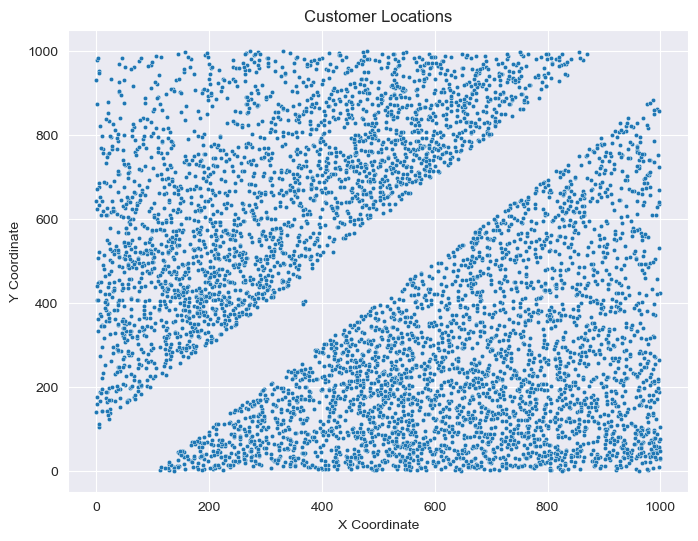

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Customer locations visualized
plt.figure(figsize=(8, 6))
sns.scatterplot(x=locations_df['x'], y=locations_df['y'],s=10)
plt.title("Customer Locations")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

### Step 2: Apply K-Means Clustering
We use k-means to identify three optimal depot locations. We assign each customer a depot label and convert the cluster centers back to the original scale. A scatter plot is then created, where customers are colored based on their assigned depot, and the depot locations are marked with red "X" markers.

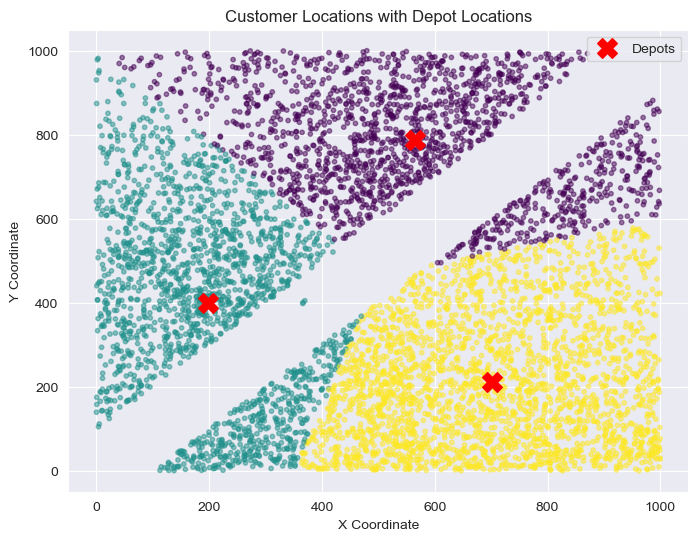

In [126]:
num_depots = 3

# Applied K-Means
kmeans = KMeans(n_clusters=num_depots, random_state=42, n_init=10)
locations_df['Depot'] = kmeans.fit_predict(X_scaled)

# Converted cluster centers to original scale
depot_locations = scaler.inverse_transform(kmeans.cluster_centers_)

# Scatter plot with cluster colors in original scale
plt.figure(figsize=(8, 6))
plt.scatter(locations_df['x'], locations_df['y'], c=locations_df['Depot'], cmap='viridis', alpha=0.5, s=10)
plt.scatter(depot_locations[:, 0], depot_locations[:, 1], c='red', marker='X', s=200, label='Depots')
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Customer Locations with Depot Locations")
plt.legend()
plt.show()

### Step 3: Attach Depot Information to Customers
Now, we add the depot information to the customer dataset.

In [127]:
# Add depot assignments to the original DataFrame
locations_df['closest_depot_x'] = locations_df['Depot'].map(lambda d: depot_locations[d, 0])
locations_df['closest_depot_y'] = locations_df['Depot'].map(lambda d: depot_locations[d, 1])

# Print first 10 rows
print(locations_df.head(10))

   clientid           x           y  Depot  closest_depot_x  closest_depot_y
0         1  622.771572  164.857623      2       701.313314       211.451823
1         2  416.357298  630.193634      0       564.250986       787.904875
2         3  292.735020  567.333231      1       196.957099       399.022426
3         4  737.211288  166.225676      2       701.313314       211.451823
4         5  540.475375  682.912298      0       564.250986       787.904875
5         6  535.469492  318.439661      2       701.313314       211.451823
6         7  640.380050  870.833221      0       564.250986       787.904875
7         8  235.772075  359.048203      1       196.957099       399.022426
8         9  481.896884  661.491838      0       564.250986       787.904875
9        10  730.032789  312.177817      2       701.313314       211.451823


### Step 4: Experiment with Different Number of Depots
We will now apply Agglomerative Hierarchical Clustering to group customer locations into different depot assignments. First, we will try different values for the number of depots (3, 5, and 10) to observe how clustering changes. Then, we will visualize the results by plotting the customer locations, coloring them based on their assigned depot, and marking depot locations with red "X" markers. Finally, we will analyze how the depot assignments change with varying cluster numbers. Increasing the number of depots reduces the distance between depots and customers but increases operational costs.

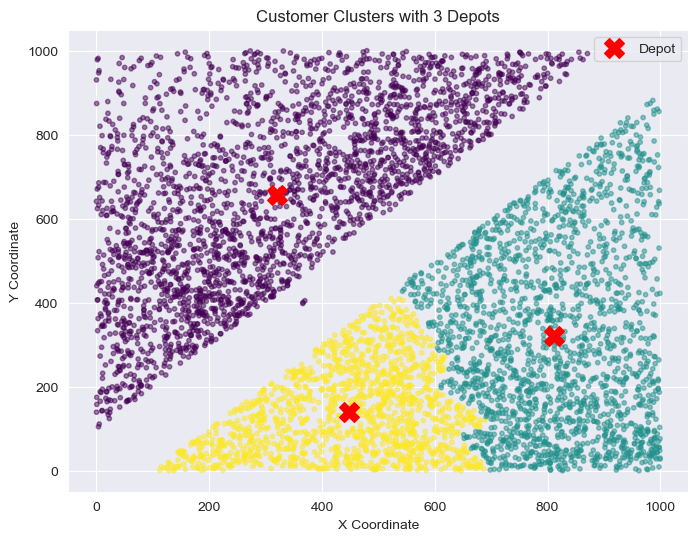

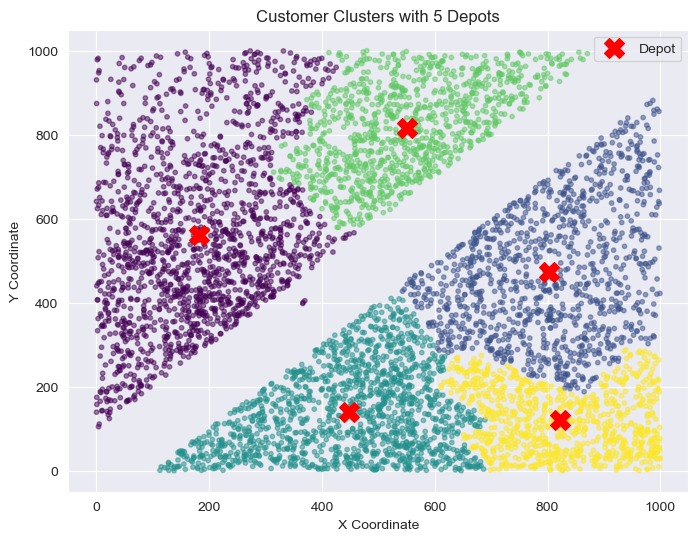

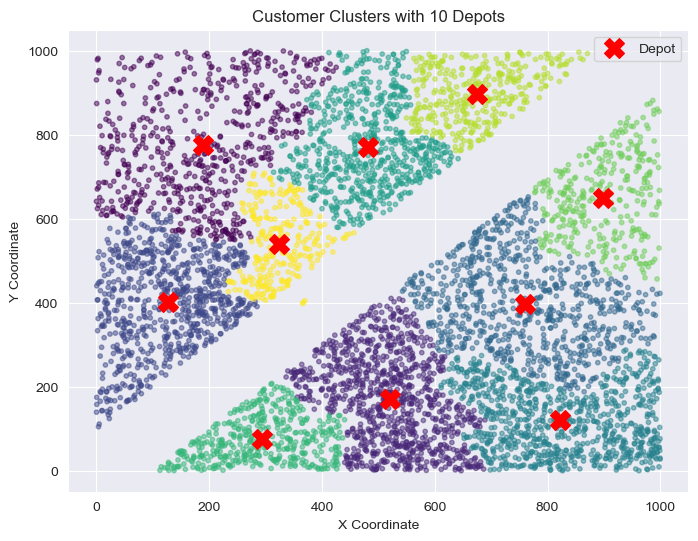

In [128]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

for k in [3, 5, 10]:
    # Apply Agglomerative Hierarchical Clustering to standardized data
    hierarchical = AgglomerativeClustering(n_clusters=k)
    locations_df['Depot'] = hierarchical.fit_predict(X_scaled)  # Use X_scaled here

    # Scatter plot with cluster colors in original scale
    plt.figure(figsize=(8, 6))
    plt.scatter(locations_df['x'], locations_df['y'], c=locations_df['Depot'], cmap='viridis', alpha=0.5, s=10)

    # Calculate and plot depot locations (mean of cluster points)
    for i in range(k):
        cluster_points = locations_df[locations_df['Depot'] == i][['x', 'y']]
        depot_x = cluster_points['x'].mean()
        depot_y = cluster_points['y'].mean()
        plt.scatter(depot_x, depot_y, c='red', marker='X', s=200, label='Depot' if i == 0 else "")  # Only label the first depot

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title(f"Customer Clusters with {k} Depots")
    plt.legend()
    plt.show()


### Step 5: Compare with Hierarchical Clustering
This code implements Agglomerative Hierarchical Clustering to identify depot locations. It iterates over different values of k (3, 5, and 10) to perform clustering, measuring the execution time for each clustering operation. It prints the time taken for each clustering operation, providing insight into the computation efficiency for varying numbers of depots.

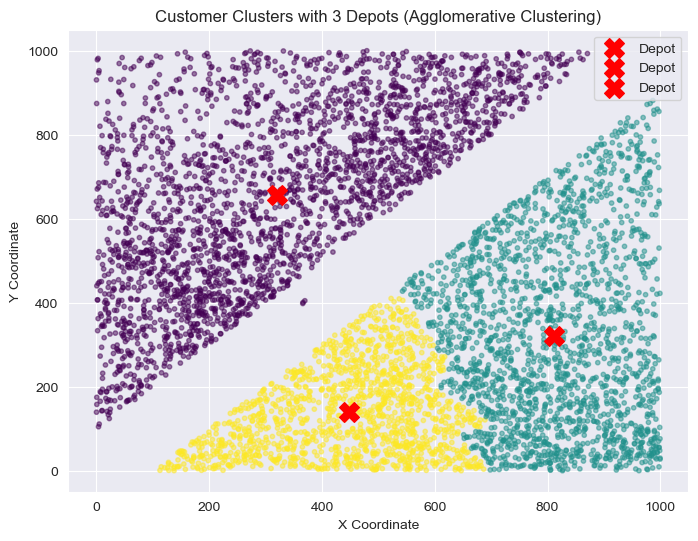

Agglomerative Clustering with 3 depots took 0.4595 seconds


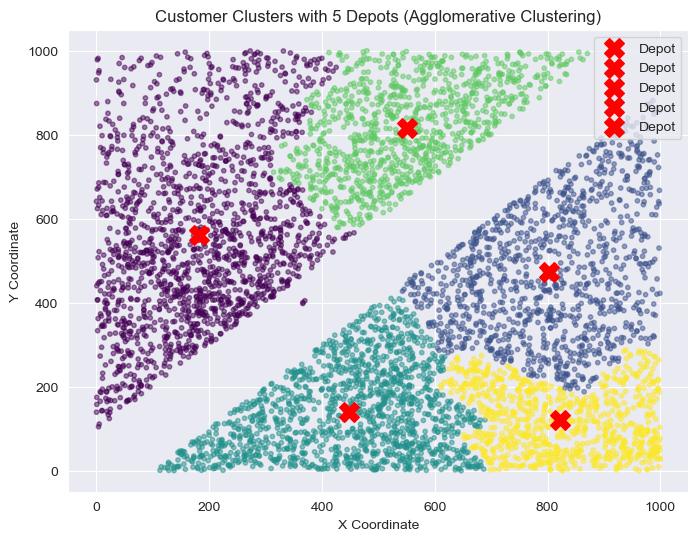

Agglomerative Clustering with 5 depots took 0.5657 seconds


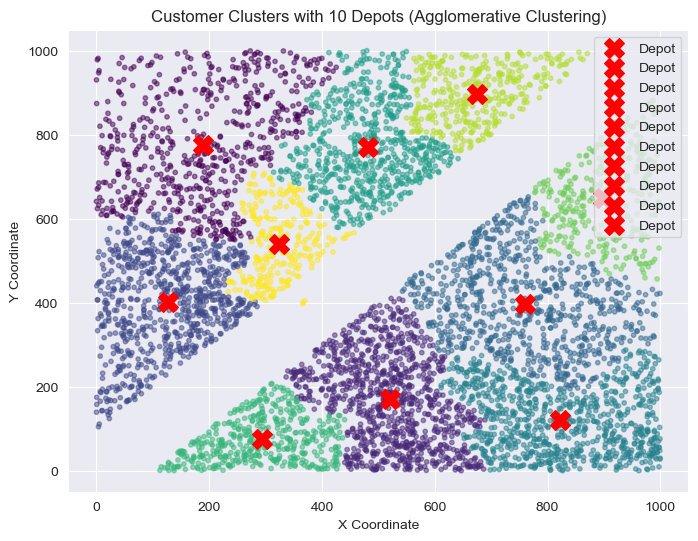

Agglomerative Clustering with 10 depots took 0.5657 seconds


In [129]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import AgglomerativeClustering


for k in [3, 5, 10]:
    start_time = time.time()  # Start timer

    # Apply Agglomerative Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=k)
    locations_df['Depot'] = hierarchical.fit_predict(X_scaled)

    # Compute depot locations as the mean of cluster points
    depot_locations = np.array([
        locations_df[locations_df['Depot'] == cluster][['x', 'y']].mean().values
        for cluster in range(k)
    ])

    # Scatter plot with cluster colors in original scale
    plt.figure(figsize=(8, 6))
    plt.scatter(locations_df['x'], locations_df['y'], c=locations_df['Depot'], cmap='viridis', alpha=0.5, s=10)

    # Plot depot locations with correct labels
    for i, (depot_x, depot_y) in enumerate(depot_locations):
        plt.scatter(depot_x, depot_y, c='red', marker='X', s=200, label='Depot')

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title(f"Customer Clusters with {k} Depots (Agglomerative Clustering)")
    plt.legend()
    plt.show()

    print(f"Agglomerative Clustering with {k} depots took {time.time() - start_time:.4f} seconds")


#### Association Rule Mining
Association rule mining is a technique used to find patterns or relationships in a given dataset, especially to recognize which products are frequently bought together.

In this example, we are using the Apriori algorithm to identify these patterns. In this assingment Apriori helps us find the most frequent combinations of products, meaning what sets of items are often bought together.

In the code example, we are using a 5% support threshold. This means that if a set of products appears together in more than 5% of the transactions, we create a rule for this product set or pair.

##### Structure of the Rule:
The rule is created using two classifications:

- Antecedent: The condition (e.g., "Product A was bought").
- Consequent: The result (e.g., "Product B was bought").

When creating this rule, we use the confidence metric. Confidence measures the likelihood that Product B will be bought if Product A is already in the cart. The minimum confidence threshold is set to 60%. This means that if the purchase of Product A leads to the purchase of Product B more than 60% of the time, we can assume there’s a meaningful association.

Finally, we sort the rules based on lift. Lift measures the strength of the association between the items compared to what would be expected by random chance. A lift greater than 1 indicates that the two items are more likely to be bought together deliberately, rather than by chance.

##### Rule Metrics:
- Support: The frequency of the itemset appearing in the dataset (i.e., how often this set of items is bought together).
- Confidence: The probability that the consequent item (Product B) is bought when the antecedent item (Product A) is in the cart.
- Lift: The ratio of the observed frequency of the itemset appearing together to the frequency expected if the items were independent of each other. A lift > 1 indicates a strong association.


In [130]:
# Find frequently bought product combinations
frequent_itemsets = apriori(Y, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Sort by lift (stronger relationships first)
rules = rules.sort_values(by="lift", ascending=False)

# Display first few rules as a table
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

  antecedents consequents  support  confidence      lift
1   ( Prod15)    ( Prod9)  0.11145    0.938131  4.725388
2   ( Prod19)   ( Prod20)  0.13476    0.653350  4.415125
3   ( Prod20)   ( Prod19)  0.13476    0.910664  4.415125
0    ( Prod5)   ( Prod12)  0.06683    0.638971  4.000822


## Evaluation 

K-Means: Käytetään inertia-arvoa ja silhouette-scorea arvioimaan klusteroinnin laatua.
Assosiaatiosäännöt: Analysoidaan sääntöjen lift-arvoja ja tukitasoja varmistaaksemme, että ne ovat merkityksellisiä.

#### Evaluation of K-Means Model:
Several evaluation metrics are calculated for the K-Means model:

Inertia: The sum of distances between data points and their cluster centers.
Silhouette Score: Measures how well the data points are grouped. A value close to +1 indicates good clustering, while negative values suggest poor clustering.
Calinski-Harabasz Index: Evaluates the density and separation of clusters. A higher value is generally better.
Davies-Bouldin Index: Assesses cluster distinctiveness. A lower value is better.

#### Agglomerative Clustering and Its Evaluation:
Testing Different Cluster Numbers: The Agglomerative Clustering algorithm is tested with different cluster counts (3, 5, 10), and execution time is measured.
Depot Location Calculation: The average position of customer points within each cluster is calculated and used as the depot location.
Visualization: A scatter plot is drawn, with each cluster shown in a different color. The depot location is marked with a large red "X".
Evaluation Metrics: The same metrics used for K-Means are calculated for the hierarchical model. The results and computation time are displayed.


In [131]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

# Lasketaan arviointimittarit K-Means -mallille
kmeans_inertia = kmeans.inertia_
kmeans_silhouette = silhouette_score(X_scaled, kmeans.labels_)
kmeans_calinski = calinski_harabasz_score(X_scaled, kmeans.labels_)
kmeans_davies = davies_bouldin_score(X_scaled, kmeans.labels_)

print("K-Means Evaluation Metrics:")
print(f"Inertia: {kmeans_inertia:.2f}")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Calinski-Harabasz Index: {kmeans_calinski:.2f}")
print(f"Davies-Bouldin Index: {kmeans_davies:.4f}")

# Lasketaan arviointimittarit hierarkkiselle mallille
silhouette = silhouette_score(X_scaled, locations_df['Depot'])
calinski = calinski_harabasz_score(X_scaled, locations_df['Depot'])
davies = davies_bouldin_score(X_scaled, locations_df['Depot'])

elapsed_time = time.time() - start_time
print(f"\nAgglomerative Clustering with {k} depots:")
print(f"Time taken: {elapsed_time:.4f} seconds")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski:.2f}")
print(f"Davies-Bouldin Index: {davies:.4f}\n")


K-Means Evaluation Metrics:
Inertia: 4211.18
Silhouette Score: 0.4237
Calinski-Harabasz Index: 5443.09
Davies-Bouldin Index: 0.7962

Agglomerative Clustering with 10 depots:
Time taken: 1.1377 seconds
Silhouette Score: 0.3295
Calinski-Harabasz Index: 5617.01
Davies-Bouldin Index: 0.8641


#### K-Means Evaluation Metrics
- Inertia (4211.18): Inertia measures how close data points are to their cluster centers. A lower value is better. Here, 4211.18 shows the clustering quality, but its meaning depends on the data.  
- Silhouette Score (0.4237): This score ranges from -1 to 1. A higher value means better clustering. A score of 0.4237 means the clusters are fairly good but could be improved. 
- Calinski-Harabasz Index (5443.09):  A higher value means the clusters are well separated. A score of 5443.09 suggests that there is good separation between the clusters.
- Davies-Bouldin Index (0.7962): A lower value is better. A score of 0.7962 means the clusters are well separated.  
#### Agglomerative Clustering (10 depots)
- Time taken (15.9574 seconds):  Agglomerative Clustering took about 16 seconds, which is quite long. This method can be slow, especially with large datasets.  
- Silhouette Score (0.3295): Lower than K-Means' 0.4237, which suggests that the clusters are not as clearly separated.
- Calinski-Harabasz Index (5617.01):  Slightly higher than K-Means, meaning good separation between clusters, but needs to be analyzed with other metrics.  
- Davies-Bouldin Index (0.8641): igher than K-Means (0.7962), meaning the clusters are not as well separated than k-means.  

K-means creates clearer and better-separated clusters.  
Agglomerative Clustering with 10 clusters is computationally heavy (about 16 seconds) and its clusters are not as tightly separated as in K-Means.
K-Means is likely a better choice for this data, but Agglomerative Clustering may improve with fine-tuning.

####  Association Rules
There are three Support Distribution histograms, which visualize the frequency of different support, confidence and lift values ​​in association rule mining results.

Calculating Average Support, Average Confidence, and Average Lift helps summarize the overall strength and reliability of the association rules, providing insights into how frequently itemsets appear together and how meaningful their relationships are.

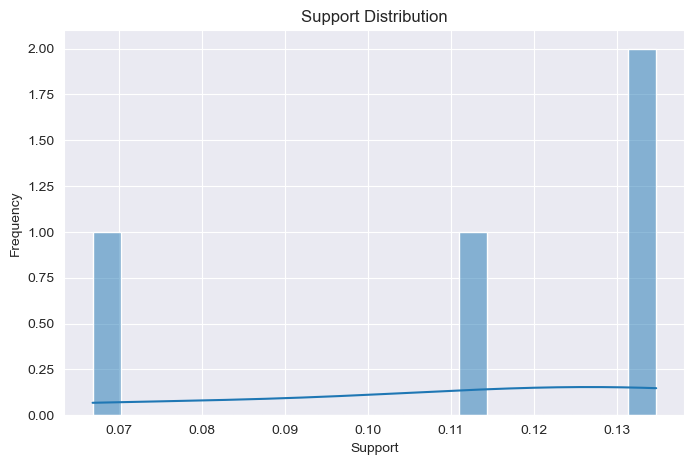

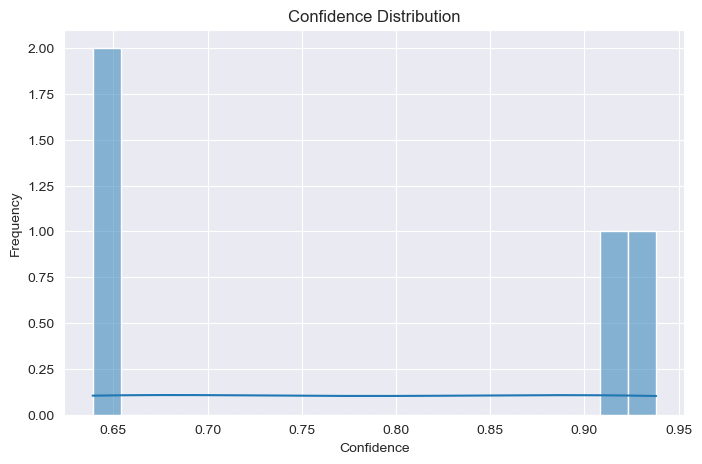

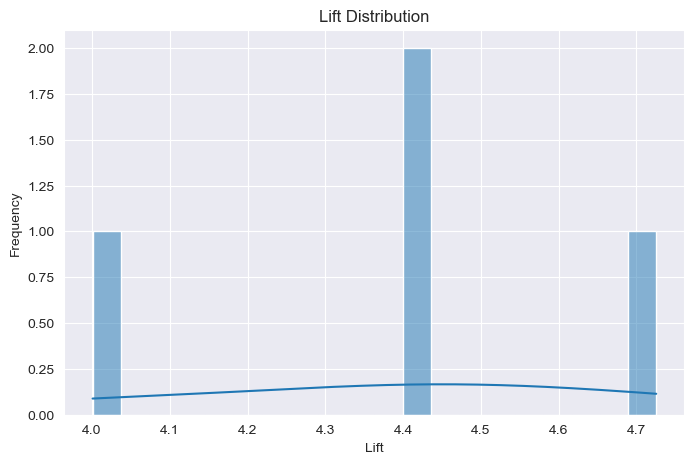

Evaluation Summary:
Average Support: 0.1119
Average Confidence: 0.7853
Average Lift: 4.3891


In [132]:
# Support distribution
plt.figure(figsize=(8, 5))
sns.histplot(rules['support'], bins=20, kde=True)
plt.title("Support Distribution")
plt.xlabel("Support")
plt.ylabel("Frequency")
plt.show()

# Confidence distribution
plt.figure(figsize=(8, 5))
sns.histplot(rules['confidence'], bins=20, kde=True)
plt.title("Confidence Distribution")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.show()

# Lift distribution
plt.figure(figsize=(8, 5))
sns.histplot(rules['lift'], bins=20, kde=True)
plt.title("Lift Distribution")
plt.xlabel("Lift")
plt.ylabel("Frequency")
plt.show()

avg_support = rules['support'].mean()
avg_confidence = rules['confidence'].mean()
avg_lift = rules['lift'].mean()

print("Evaluation Summary:")
print(f"Average Support: {avg_support:.4f}")
print(f"Average Confidence: {avg_confidence:.4f}")
print(f"Average Lift: {avg_lift:.4f}")


Average Support (0.1119): The product combinations appear in 11.19% of all transactions. A higher support value means the rule applies to many purchases, making it more important.

Average Confidence (0.7853): This means that if one product is bought, there is a high chance that the other product is also bought.

Average Lift (4.3891): These items are over 4 times more likely to be bought together than by chance, showing a strong connection.

These numbers show that the rules are useful. High confidence and lift values mean strong links between products, making them helpful for recommendations, cross-selling, and marketing.

## Deployment 
#### Saving and Loading Models

To use clustering and association models in production, they must be saved and later reloaded. The joblib or pickle library can be used for this:

In [133]:
import joblib
from sklearn.cluster import KMeans

# Save KMeans model to file
kmeans_model = KMeans(n_clusters=3, random_state=42)
joblib.dump(kmeans_model, 'kmeans_model.pkl')

# Save Association Rules model to file
association_rules_model = [rules]  
joblib.dump(association_rules_model, 'association_rules.pkl')

print("Models saved successfully for deployment!")

Models saved successfully for deployment!


#### Real-World Use:

- Use depot optimization in delivery systems to lower costs and make deliveries faster.
- Use association rule mining to recommend products in online stores and for targeted ads.

#### Future Improvements:

- Automate depot assignment with real-time updates based on demand.
- Improve clustering models using location data and smart optimization.
- Keep updating product association rules with new sales data to make better recommendations.